# Project 7 - HR Attrtion Prediction

## 1. Load the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
hr = pd.read_csv('HR.csv')

## 2. EDA

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2.1 Missing Values

### 2.2 Target Distribution

In [5]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
left = hr[(hr['left'] == 1)]
no_left = hr[(hr['left'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(left), len(no_left)), y = ['Left', 'Still_Employed'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of left variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Left','Still_Employed'],values = hr['left'].value_counts(),
              textfont = dict(size=15),opacity = 0.8,
              marker = dict(colors = ['lightskyblue','gold'],
              line = dict(color='#000000',width=1.5)))


layout = dict(title =  'Distribution of left variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

### 2.3 Independent Variables Correlation Analysis

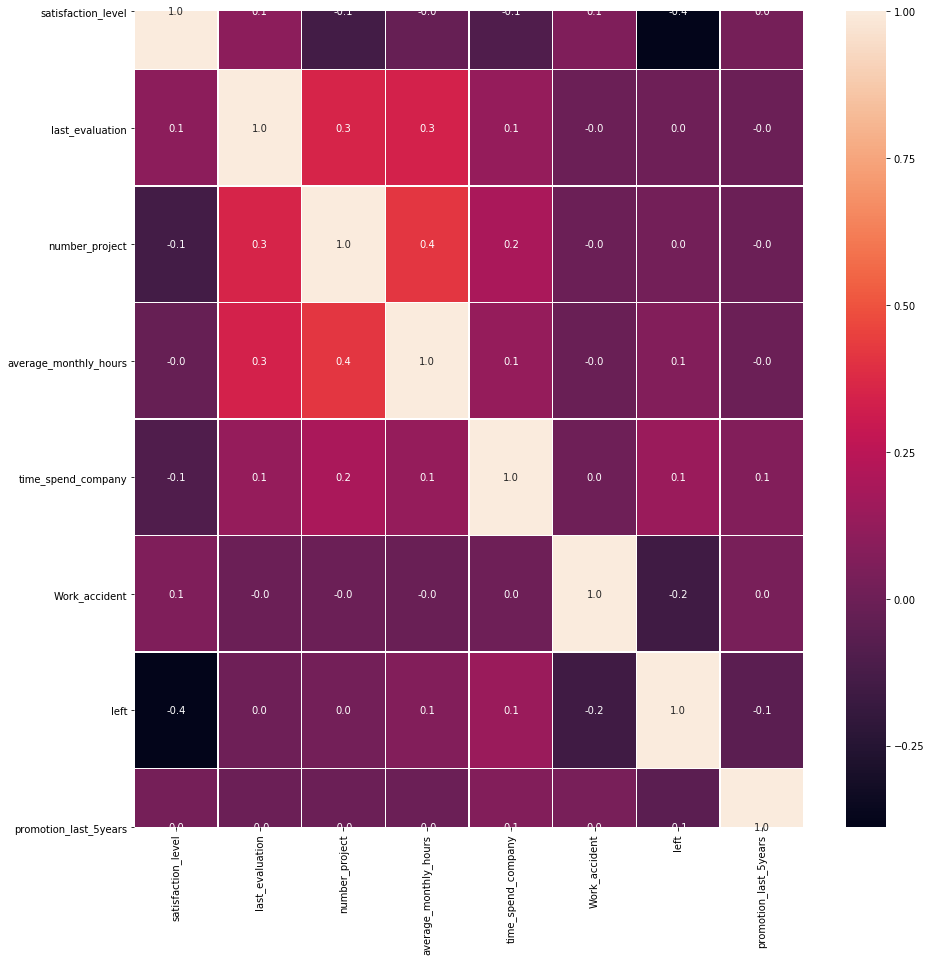

In [8]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(hr.corr(), annot=True, linewidths = 0.5, fmt = '0.1f', ax = ax)
plt.show()

In [9]:
# create bins for hours
bins = [0,100,120,140,160,180,200,220,240,260,280,300,320]
hr['hoursbin']=pd.cut(hr['average_monthly_hours'],bins)
hr['hoursbin'].value_counts()

(140, 160]    2484
(240, 260]    2064
(220, 240]    1759
(160, 180]    1644
(260, 280]    1582
(180, 200]    1540
(200, 220]    1508
(120, 140]    1457
(280, 300]     403
(100, 120]     326
(300, 320]     159
(0, 100]        73
Name: hoursbin, dtype: int64

In [10]:
hr['hoursbin'] = hr['hoursbin'].astype("str")
hr.head()
type(hr['hoursbin'][2])

str

In [11]:
hr['hoursbin'].value_counts().sort_values()

(0, 100]        73
(300, 320]     159
(100, 120]     326
(280, 300]     403
(120, 140]    1457
(200, 220]    1508
(180, 200]    1540
(260, 280]    1582
(160, 180]    1644
(220, 240]    1759
(240, 260]    2064
(140, 160]    2484
Name: hoursbin, dtype: int64

### 2.4 Features Distribution and Barplot

In [12]:
def barplot(var_select) :
    
    tmp1 = pd.DataFrame(pd.crosstab(hr[var_select],hr['left']), )
    tmp1['left%'] = tmp1[1] / (tmp1[1] + tmp1[0]) * 100

    color=['lightskyblue','gold' ]
    
    trace1 = go.Bar(
        x=tmp1.index,
        y=tmp1[1],
        name='Left',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp1.index,
        y=tmp1[0],
        name='Still_Employed', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp1.index,
        y=tmp1['left%'],
        yaxis = 'y2',
        name='% Left', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 105], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Left'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [13]:
# barplot('column')
barplot('satisfaction_level')
barplot('number_project')

## 3. Building Model

In [14]:
cat_data = hr.select_dtypes(include = 'object')
tmp = list(cat_data)
for i in range(len(tmp)):
    hr = pd.get_dummies(hr, columns = [tmp[i]])

In [15]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,"hoursbin_(120, 140]","hoursbin_(140, 160]","hoursbin_(160, 180]","hoursbin_(180, 200]","hoursbin_(200, 220]","hoursbin_(220, 240]","hoursbin_(240, 260]","hoursbin_(260, 280]","hoursbin_(280, 300]","hoursbin_(300, 320]"
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(hr, test_size = 0.2)

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, recall_score, f1_score

X_train = train.drop("left", axis = 1, inplace = False)
Y_train = train['left']
X_test = test.drop("left", axis = 1, inplace = False)
Y_test = test['left']

model = KNN(n_neighbors = 3, algorithm = 'auto', weights = 'distance')
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

print('KNN')
print('acc:',accuracy_score(Y_test,y_pred))
print('recall:',recall_score(Y_test,y_pred))
print('f1:',f1_score(Y_test,y_pred))

KNN
acc: 0.955
recall: 0.9471544715447154
f1: 0.9119373776908023


In [18]:
#Logistic
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 100, class_weight = 'balanced', max_iter = 1000)
model.fit(X_train,Y_train)

y_score = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

print('Logistic Regression')
print('acc:',accuracy_score(Y_test,y_pred))
print('recall:',recall_score(Y_test,y_pred))
print('f1:',f1_score(Y_test,y_pred))

Logistic Regression
acc: 0.8026666666666666
recall: 0.8631436314363143
f1: 0.682743837084673


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

def roccurve():
    model_roc_auc = round(roc_auc_score(Y_test, y_score),3)
    fpr, tpr, t = roc_curve(Y_test, y_score)
    trace4 = go.Scatter(x = fpr, y = tpr,
                       name = 'Roc:',
                       line = dict(color = ('rgb(22,96,167)'),width=2), fill='tozeroy')
    trace5 = go.Scatter(x = [0,1],y = [0,1],
                       line = dict(color = ('black'),width = 1.5,
                                  dash = 'dot'))
    layout = go.Layout(title=str("ROC Curve" + " " + '(' + str(model_roc_auc) + ')'),
                      xaxis = dict(title = 'false positive rate'),
                      yaxis = dict(title = 'true positive rate'))
    fig = go.Figure(data = [trace4, trace5], layout = layout)
    py.iplot(fig)

In [20]:
roccurve()

In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

Y_score = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

print('Logistic Regression')
print('acc:',accuracy_score(Y_test,y_pred))
print('recall:',recall_score(Y_test,y_pred))
print('f1:',f1_score(Y_test,y_pred))

roccurve()

Logistic Regression
acc: 0.973
recall: 0.948509485094851
f1: 0.9453072248480756


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 5,random_state = 42,n_estimators=200)
model.fit(X_train,Y_train)

Y_score = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

print('Random Forest')
print('acc:',accuracy_score(Y_test,y_pred))
print('recall:',recall_score(Y_test,y_pred))
print('f1:',f1_score(Y_test,y_pred))

roccurve()

Random Forest
acc: 0.9143333333333333
recall: 0.6612466124661247
f1: 0.7915652879156528
